<a href="https://colab.research.google.com/github/NikhithaVarma/ML-Algos/blob/main/DecisionTreeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#analysing mileage of a car depends mostly on which factors

import pandas as pd
mpg=pd.read_csv("auto-mpg.csv")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [2]:
#checking for outliers
mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [3]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [4]:
mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
#horsepower is in string format but it should be in floating point or int
#Also i can del the car name column as it doesn't show any impact
del mpg['car name']

In [6]:
mpg.shape

(398, 8)

In [7]:
mpg.horsepower.unique()


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
#there is question mark in horsepower column 
(mpg.horsepower.value_counts())['?']  #counts how many nan values r there


6

In [10]:
#can delete those nan rows
mpg = mpg.loc[mpg.horsepower != '?', :]
mpg.horsepower.unique()


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
mpg.horsepower=mpg.horsepower.astype('int')
mpg


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [14]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
mpg=mpg.drop_duplicates()
mpg.shape

(392, 8)

In [17]:
X=mpg.loc[:,mpg.columns[1:]]
y=mpg['mpg']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
381,4,107.0,75,2205,14.5,82,3
200,6,250.0,78,3574,21.0,76,1
203,4,97.0,71,1825,12.2,76,2
224,8,302.0,130,4295,14.9,77,1
296,4,121.0,80,2670,15.0,79,1
...,...,...,...,...,...,...,...
240,4,97.0,78,2190,14.1,77,2
191,6,225.0,100,3233,15.4,76,1
52,4,88.0,76,2065,14.5,71,2
141,4,98.0,83,2219,16.5,74,2


**Decision Tree Regressor**

In [21]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
y_pred

array([15. , 20. , 14. , 16. , 21.6, 13. , 19.2, 22. , 19.4, 31.6, 46.6,
       44.6, 35.1, 27. , 31.9, 18. , 14. , 16. , 18. , 20. , 28. , 24. ,
       31.8, 16. , 17.5, 20.2, 18. , 29. , 26.6, 20.2, 17.5, 22.4, 41.5,
       32.4, 32. , 27. , 12. , 19. , 16.2, 16. , 46.6, 17. , 24. , 27.5,
       19. , 28. , 18.2, 29. , 18. , 32. , 18. , 24.5, 17.5, 32.2, 14. ,
       34.3, 18. , 32.4, 15. , 29. , 32. , 26. , 28. , 28. , 37. , 22.4,
       16. , 23. , 32. , 27.9, 29. , 15. , 19. , 16. , 18. , 15.5, 27. ,
       32. , 18. ])

**Evaluating the model**

In [22]:
from sklearn.metrics import r2_score

r2score=r2_score(y_test,y_pred)
print("Test set R2 of dt: {:.2f}".format(r2score))

Test set R2 of dt: 0.70


**Linear Regression vs Decision Tree Regression**

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred_lr=lr.predict(X_test)
y_pred_lr

array([18.14354121, 25.55604199, 13.88867551, 15.18732733, 25.54130088,
       10.74379254, 16.45071694, 26.18390171, 23.94932496, 31.16087092,
       33.51086504, 29.46388247, 33.06535731, 29.06030597, 31.27863455,
       22.42766174, 11.31791864, 11.74813922, 21.41545449, 24.80056057,
       27.49821294, 28.40299844, 32.26728837, 10.87414491, 19.70379857,
       23.01622795, 20.51941188, 28.83254397, 28.58761823, 21.19269399,
       22.63024824, 24.43828055, 30.76417416, 34.45502215, 25.36427459,
       29.29612098,  7.06376256, 22.81428052, 17.31223205, 18.1589812 ,
       34.68946953, 21.57229928, 23.69468819, 29.75876788, 23.125484  ,
       25.97782648, 17.27723773, 29.37548075, 19.61467686, 29.18338225,
       21.09144208, 25.95026592, 19.11876869, 32.91553981, 12.75227033,
       33.90943926, 17.19217541, 31.27642044, 22.40944773, 29.30357919,
       32.26179795, 27.52700166, 25.65699171, 26.40457271, 30.80948879,
       22.04430603, 14.07130631, 24.34756103, 35.90877972, 25.94

In [25]:
print("Linear Regression Score : ",  r2_score(y_test,y_pred_lr))
print("Decision Tree Regression Score : ",  r2_score(y_test,y_pred))

Linear Regression Score :  0.7759727151866245
Decision Tree Regression Score :  0.7042473961033944


**Overfitting**

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,12,20,40,60]:
  dt=DecisionTreeRegressor(max_depth=depth)
  dt.fit(X_train,y_train)
  trainAccuracy=r2_score(y_train, dt.predict(X_train))
  dt=DecisionTreeRegressor(max_depth=depth)
  valAccuracy=cross_val_score(dt,X_train,y_train,cv=10, scoring = make_scorer(r2_score))
  print("Depth : ",depth, " Train R2 : ",trainAccuracy, " Val Score : ", np.mean(valAccuracy))


Depth :  1  Train R2 :  0.6007099072844044  Val Score :  0.5064813674201882
Depth :  2  Train R2 :  0.7506342408372109  Val Score :  0.6676895179240581
Depth :  3  Train R2 :  0.8598432012962622  Val Score :  0.790702898816934
Depth :  4  Train R2 :  0.9053956180474162  Val Score :  0.8122775348233452
Depth :  5  Train R2 :  0.9307767949498748  Val Score :  0.8200197566739404
Depth :  6  Train R2 :  0.9495143121792843  Val Score :  0.8015879025071841
Depth :  7  Train R2 :  0.9689183745211842  Val Score :  0.8043505498476623
Depth :  8  Train R2 :  0.9835971919632815  Val Score :  0.7866260619075894
Depth :  9  Train R2 :  0.9938373092139816  Val Score :  0.7891529747282099
Depth :  10  Train R2 :  0.9979717461769235  Val Score :  0.80942480186969
Depth :  12  Train R2 :  0.9998823918303653  Val Score :  0.7964088313869372
Depth :  20  Train R2 :  1.0  Val Score :  0.8098307500713492
Depth :  40  Train R2 :  1.0  Val Score :  0.7944152372724822
Depth :  60  Train R2 :  1.0  Val Score :

Depth=5 is the best with best cross val score                    
Depth=1 model is underfit than 2 and 2 is underfit than depth=5      
Depth=20 is overfit than depth=5
                                                 

**Feature Importance**

In [27]:
from matplotlib import pyplot
dt=DecisionTreeRegressor(max_depth=5)
dt.fit(X_train,y_train)
imp=dt.feature_importances_
list(zip(imp,X_test.columns))

[(0.004297965565552796, 'cylinders'),
 (0.6624914871353659, 'displacement'),
 (0.0436647716656714, 'horsepower'),
 (0.1485609524284575, 'weight'),
 (0.014996341439188642, 'acceleration'),
 (0.12364673471634675, 'model year'),
 (0.002341747049417075, 'origin')]

the most important feature which affects mileage is displacement followed by weight and year of model

In [28]:
#with depth=5 and the important features...we fit the decision tree regressor 
dt = DecisionTreeRegressor(max_depth = 5)
X_train = X_train.loc[:,['displacement','weight','model year']]
X_test = X_test.loc[:,['displacement','weight','model year']]
# Fit dt to the training set
dt.fit(X_train, y_train)
r2_score(dt.predict(X_test),y_test)

0.7280591754427139

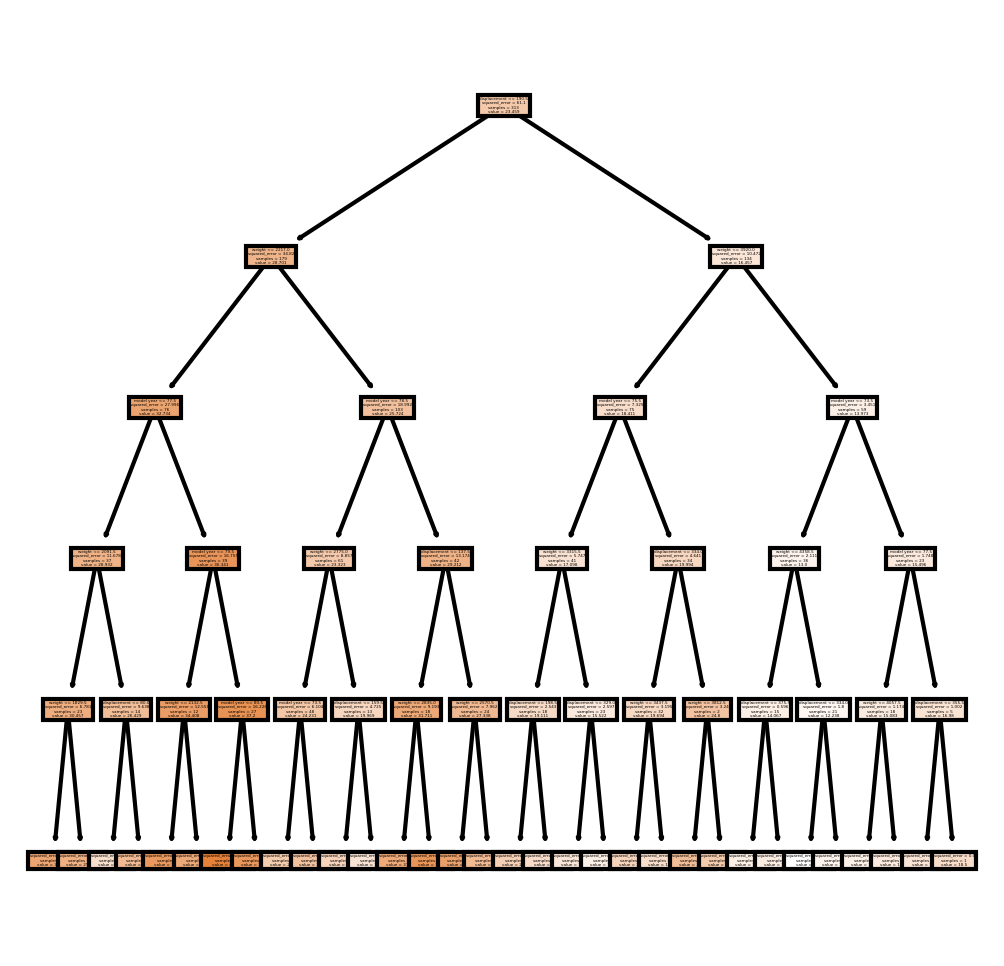

In [30]:
#visualising the binary tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dt,
               feature_names = X_test.columns,
               filled = True);
fig.savefig('imagename.png')